In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import integrate, optimize
from tqdm.auto import tqdm

## **Jiuyuan Xie, Qingyu Zhou**

## **Cumulative Cases**

In [ ]:
df=pd.read_csv("./covid_confirmed_usafacts.csv")
df

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,6468,6468,6468,6468,6468,6468,6468,6468,6468,6468
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640


In [ ]:
df['County Name'].value_counts()

Statewide Unallocated     51
Washington County         30
Jefferson County          25
Franklin County           24
Lincoln County            23
                          ..
Androscoggin County        1
Winn Parish                1
West Feliciana Parish      1
West Carroll Parish        1
Weston County              1
Name: County Name, Length: 1878, dtype: int64

In [ ]:
df=df[df['County Name']!='Statewide Unallocated']
df

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,6468,6468,6468,6468,6468,6468,6468,6468,6468,6468
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640


Text(0.5, 1.0, 'Autauga County , AL')

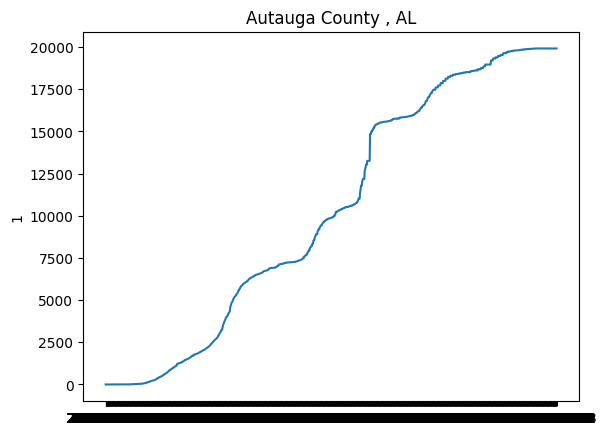

In [ ]:
sns.lineplot(df.iloc[0,4:])
plt.title(df.iloc[0]['County Name']+", "+df.iloc[0]['State'])

<ipython-input-9-fcba945157d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cases'] = date_columns


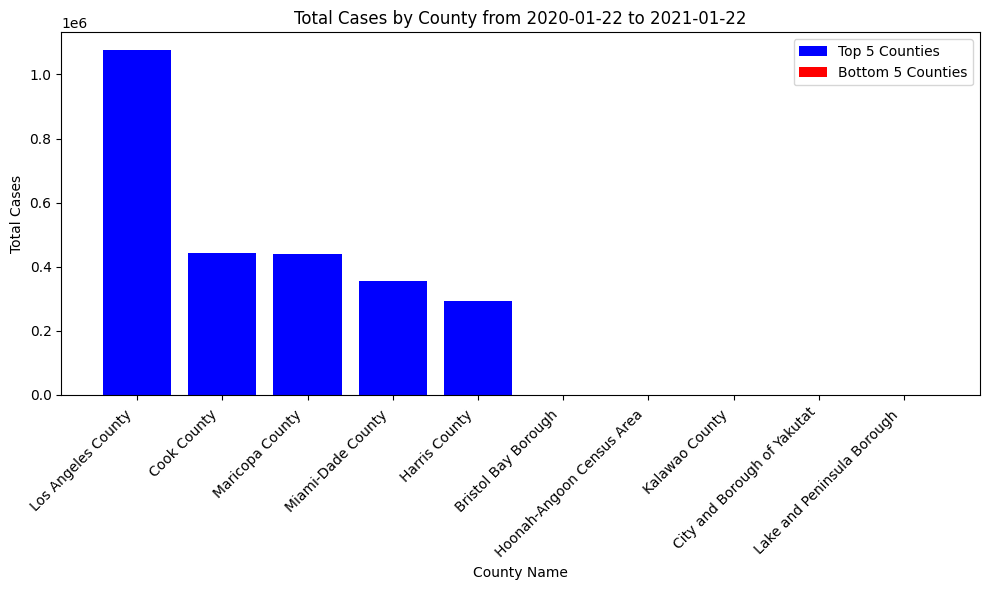

In [ ]:
# Extract columns from '2020-01-22' to '2021-01-22'
start_date = '2020-01-22'
end_date = '2021-01-22'
date_columns = df.loc[:, end_date].copy()

# Calculate the sum for each county for the specified period
df['total_cases'] = date_columns

# Sort the DataFrame based on the 'total_cases' column and reset the index
sorted_df = df.sort_values(by='total_cases', ascending=False).reset_index(drop=True)

# Get the top 5 and bottom 5 counties
top_5_counties = sorted_df.head(5)[['County Name', 'total_cases']]
bottom_5_counties = sorted_df.tail(5)[['County Name', 'total_cases']]

# Visualization
plt.figure(figsize=(10,6))

# Plotting Top 5 Counties
plt.bar(top_5_counties['County Name'], top_5_counties['total_cases'], color='b', label='Top 5 Counties')

# Plotting Bottom 5 Counties
plt.bar(bottom_5_counties['County Name'], bottom_5_counties['total_cases'], color='r', label='Bottom 5 Counties')

plt.xlabel('County Name')
plt.ylabel('Total Cases')
plt.title('Total Cases by County from 2020-01-22 to 2021-01-22')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


## **Subtract with 14 days before to get active cases for SIR**

In [ ]:
df_14before=df.iloc[:,4:-1-14]
df_14before.columns = np.arange(1251)
df_14before


,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
1,0,0,0,0,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,0,0,0,0,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,0,0,0,0,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,0,0,0,0,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,0,0,0,0,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,0,0,0,0,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206
3190,0,0,0,0,0,0,0,0,0,0,...,6468,6468,6468,6468,6468,6468,6468,6468,6468,6468
3191,0,0,0,0,0,0,0,0,0,0,...,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640


In [ ]:
df_14after=df.iloc[:,4+14:-1]
df_14after.columns = np.arange(1251)
df_14after

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
1,0,0,0,0,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,0,0,0,0,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,0,0,0,0,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,0,0,0,0,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,0,0,0,0,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,0,0,0,0,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206
3190,0,0,0,0,0,0,0,0,0,0,...,6468,6468,6468,6468,6468,6468,6468,6468,6468,6468
3191,0,0,0,0,0,0,0,0,0,0,...,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640


In [ ]:
df_active_cases = df_14after - df_14before
df_active_cases

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_active_cases.columns = df.iloc[:1,4+14:-1].columns
df_active_cases['countyFIPS'] = df['countyFIPS']
df_active_cases

,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,...,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23,countyFIPS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1001
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1003
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1005
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1007
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56037
3189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56039
3190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56041
3191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56043


## **aggregate by state**

In [ ]:
df_active_cases = df_active_cases.groupby(df['State']).sum()
df_active_cases.reset_index(inplace=True)
df_active_cases

,State,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,...,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23,countyFIPS
0,AK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62340
1,AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71489
2,AR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380625
3,AZ,1,1,1,1,0,0,0,0,0,...,2250,2250,2250,2250,2250,2250,2250,2250,2250,60208
4,CA,-683,-690,-690,-667,-667,-670,-667,-667,-670,...,11057,10814,10802,10362,9833,8755,7826,6931,6288,351364
5,CO,0,0,0,0,0,0,0,0,0,...,1059,1059,1059,1059,1059,610,610,610,610,515983
6,CT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,72064
7,DC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11001
8,DE,0,0,0,0,0,0,0,0,0,...,232,232,232,232,232,307,200,200,200,30009
9,FL,0,0,0,0,0,0,0,0,0,...,-5355,-5355,-5355,-5355,-5355,-5355,0,0,0,808550


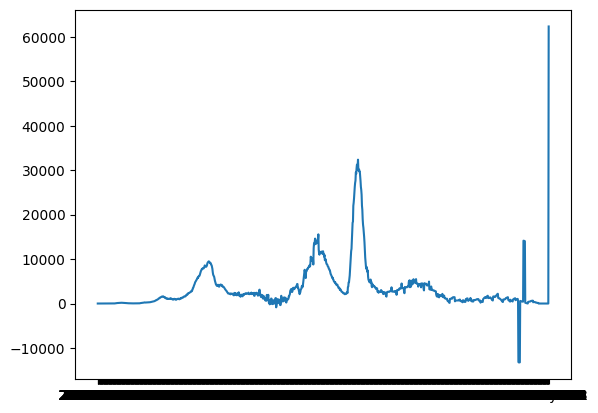

In [ ]:
plt.plot(df_active_cases.iloc[0])

## **Get county population aggregate by state**

In [ ]:
df_population=pd.read_csv("./covid_county_population_usafacts.csv")
df_population
df_population=df_population[df_population['County Name']!='Statewide Unallocated']
df_population = df_population.groupby('State').sum()
df_population.reset_index(inplace=True)
df_population

<ipython-input-138-5b107a87f4ef>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_population = df_population.groupby('State').sum()


,State,countyFIPS,population
0,AK,64610,731545
1,AL,71489,4903185
2,AR,380625,3017804
3,AZ,60208,7278717
4,CA,357364,39512223
5,CO,515983,5758736
6,CT,72064,3565287
7,DC,11001,705749
8,DE,30009,973764
9,FL,808550,21477737


## **SIR model**

In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


## **Fit and store beta for all counties**

Fitting betas for all counties...:   0%|          | 0/51 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


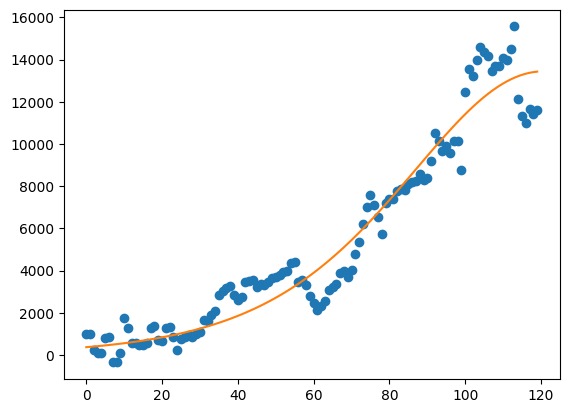

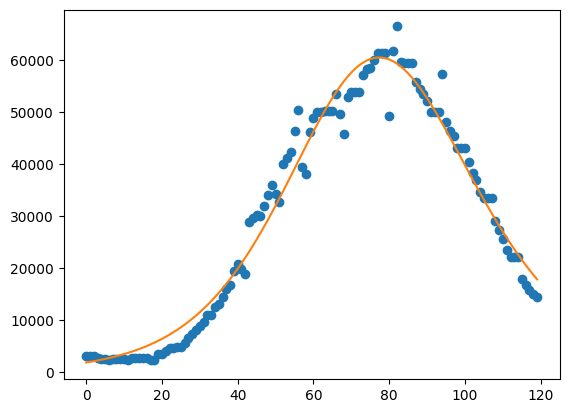

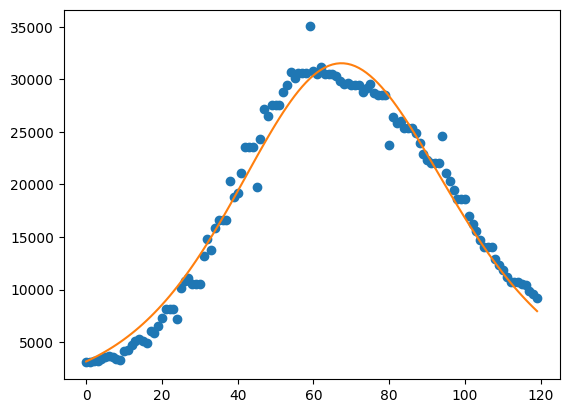

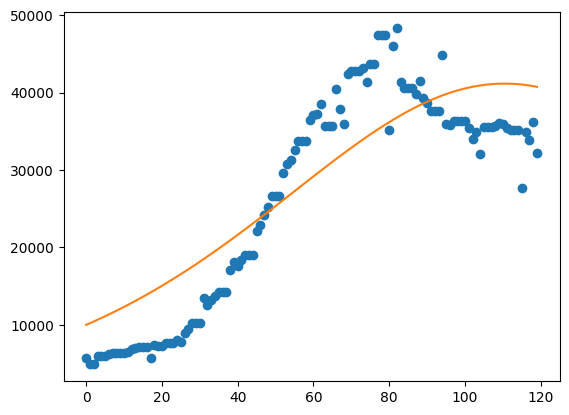

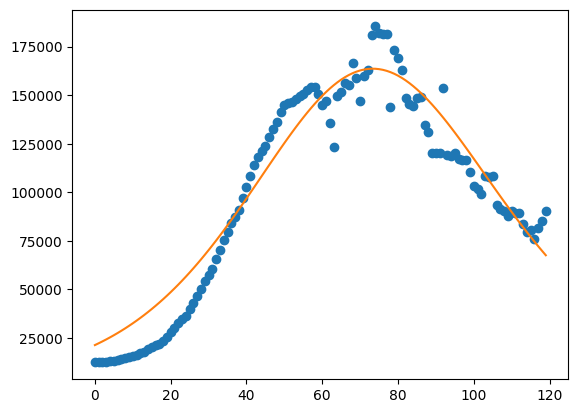

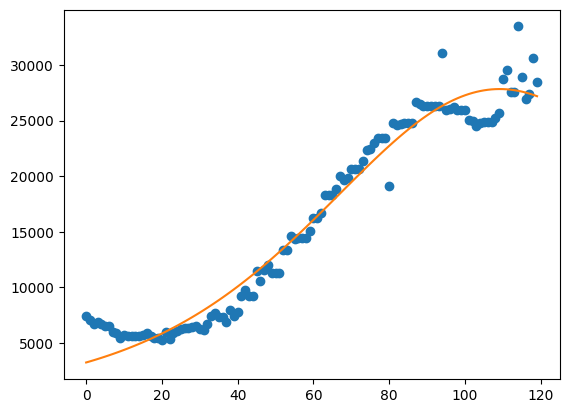

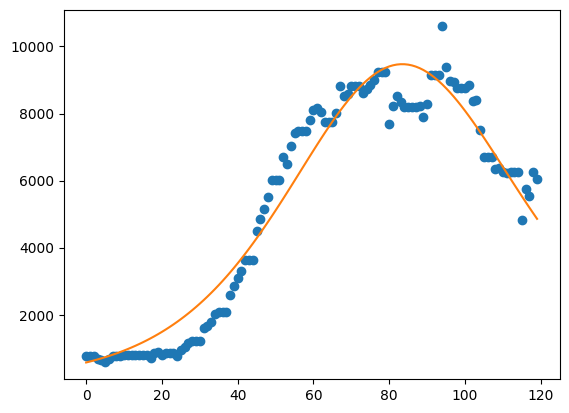

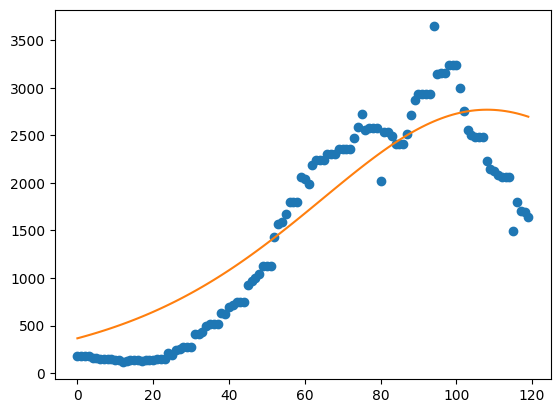

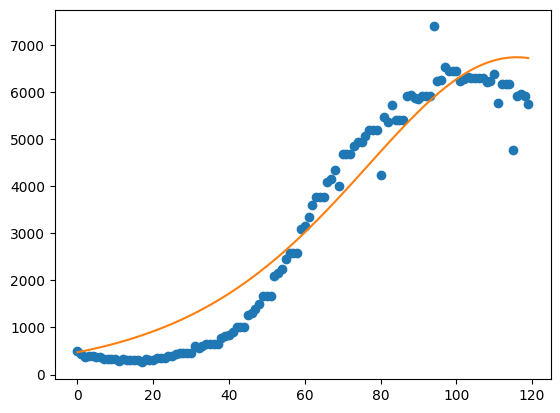

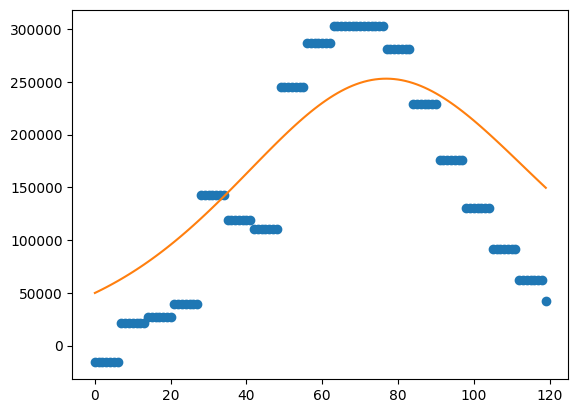

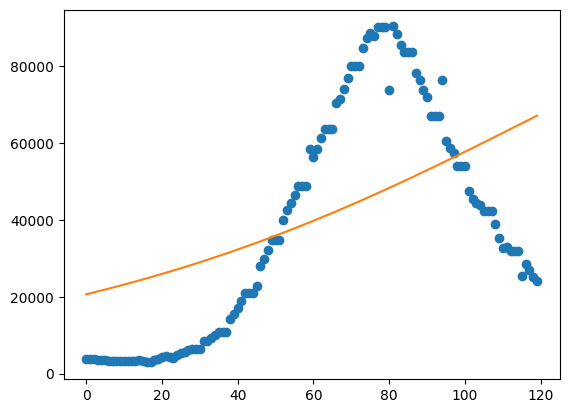

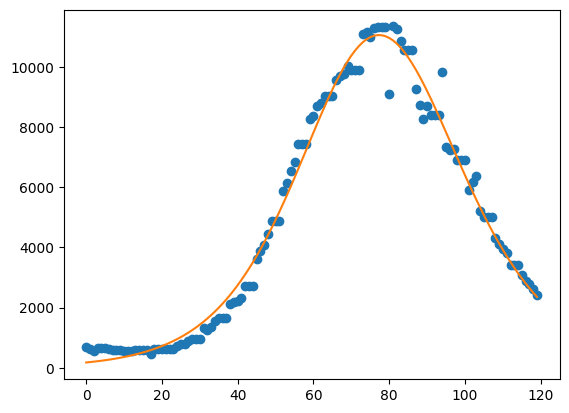

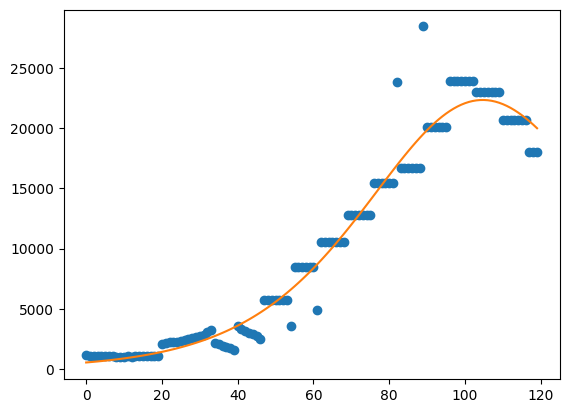

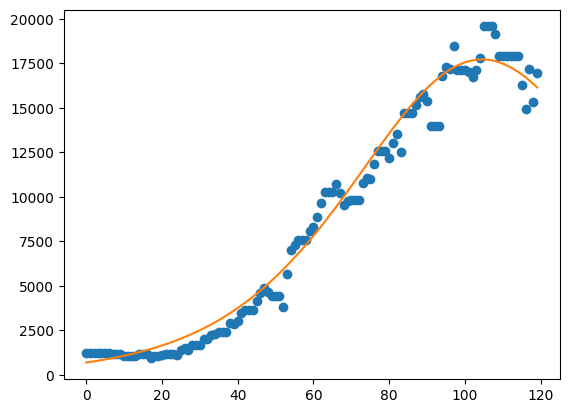

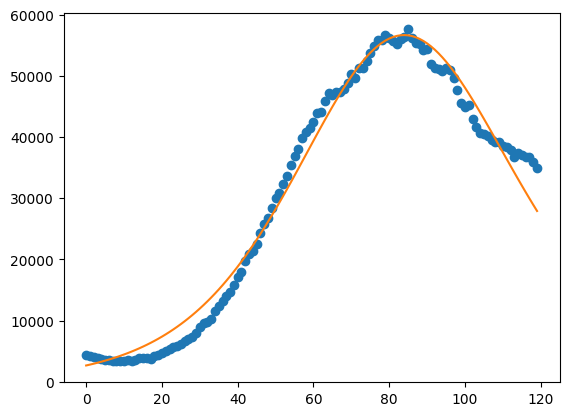

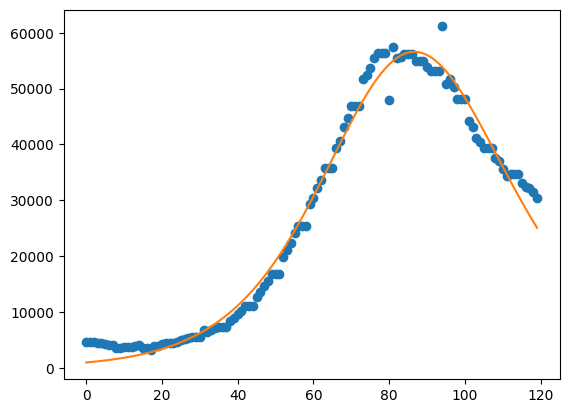

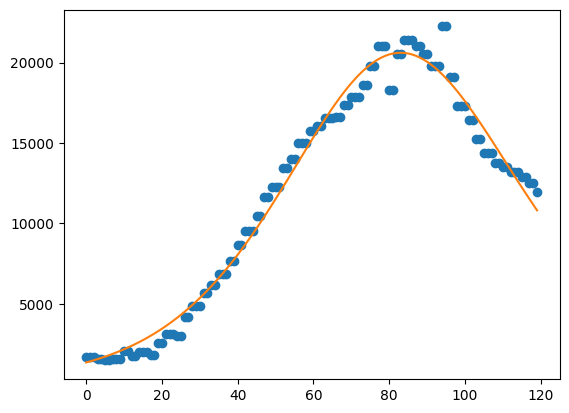

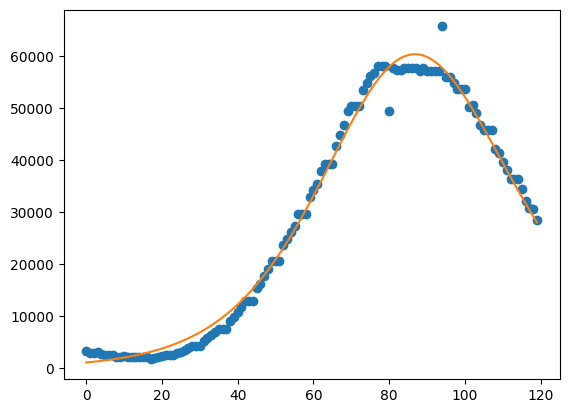

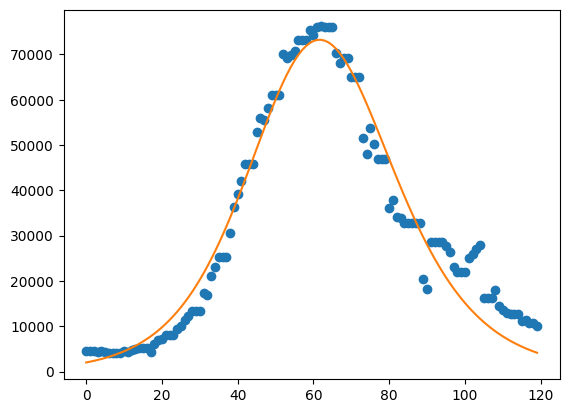

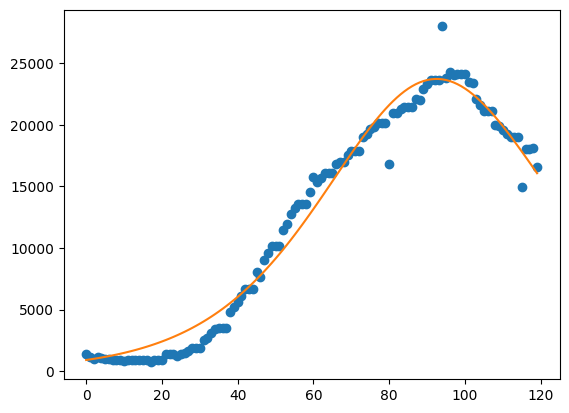

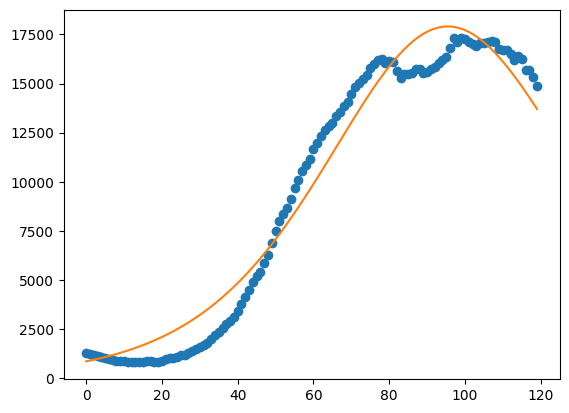

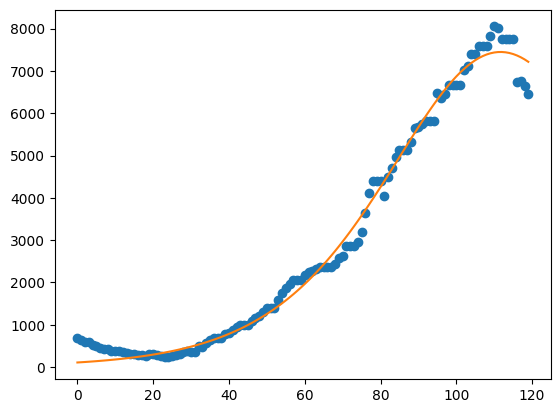

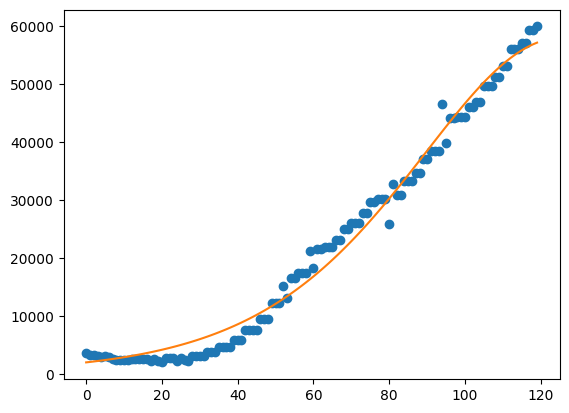

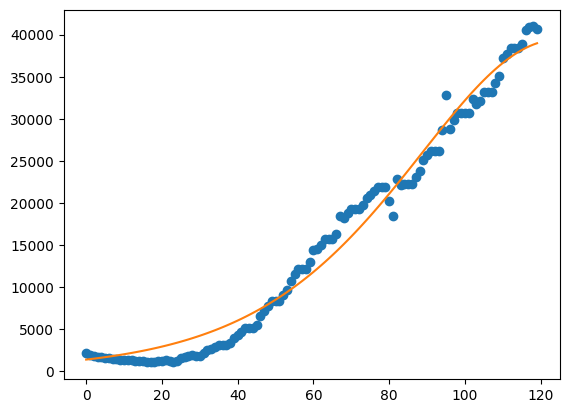

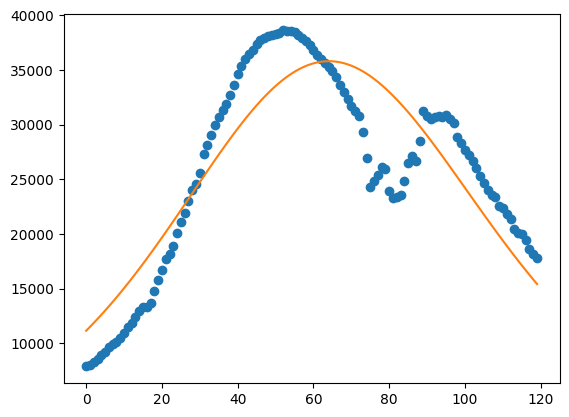

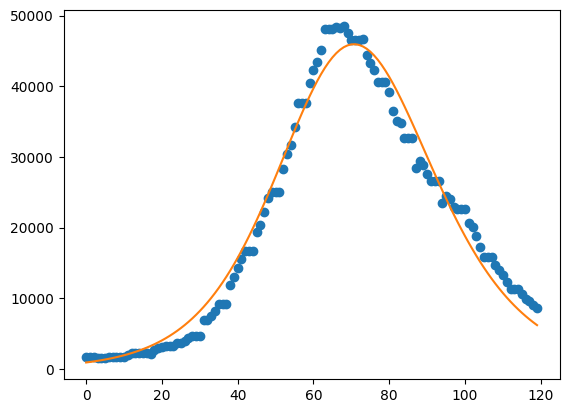

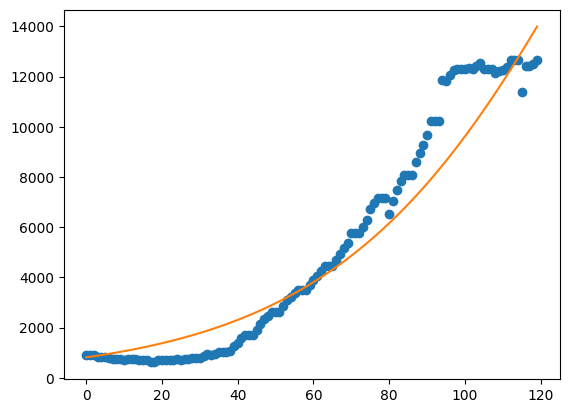

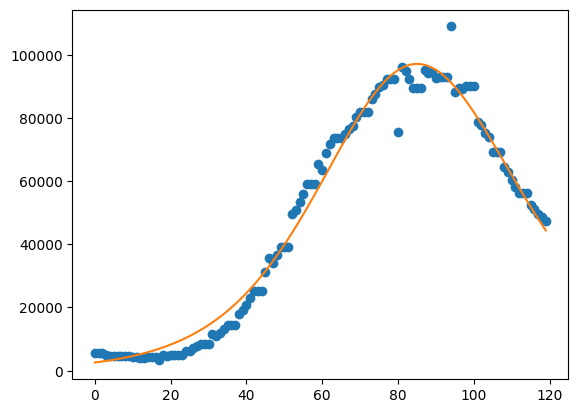

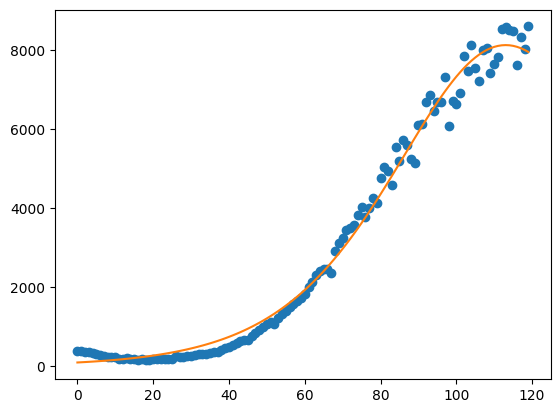

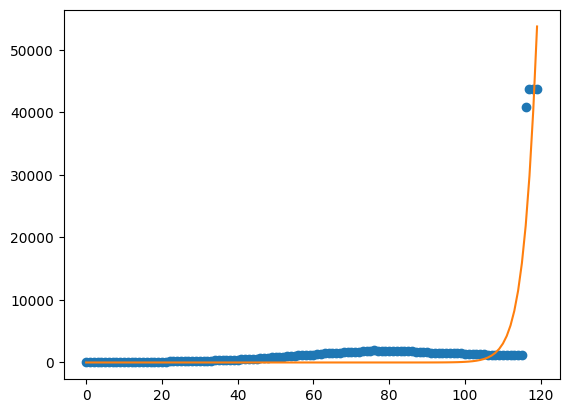

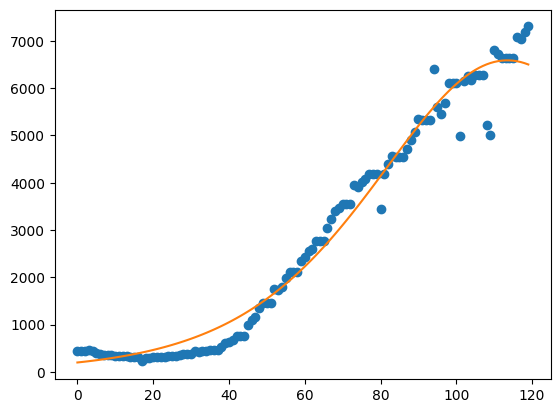

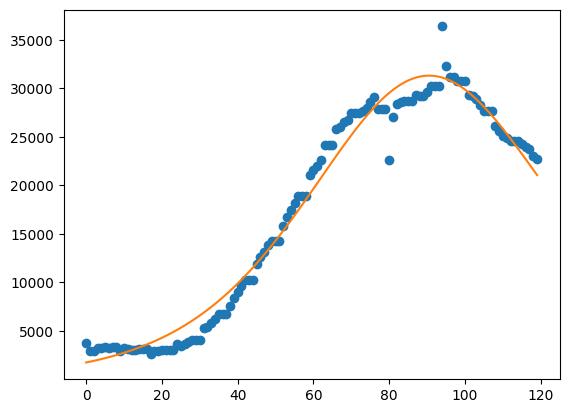

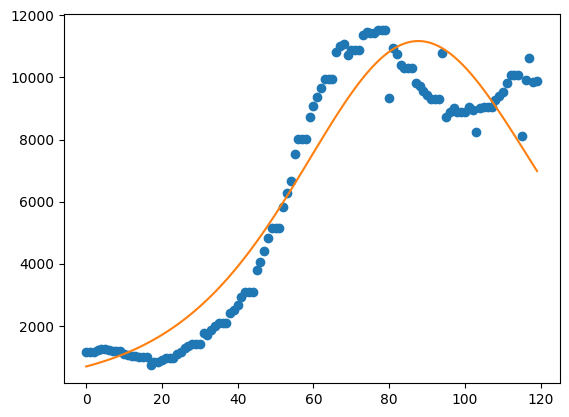

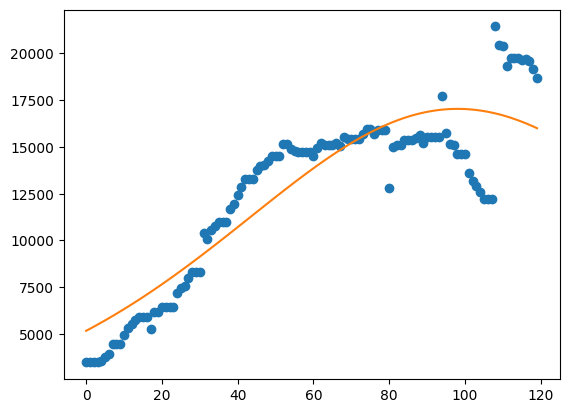

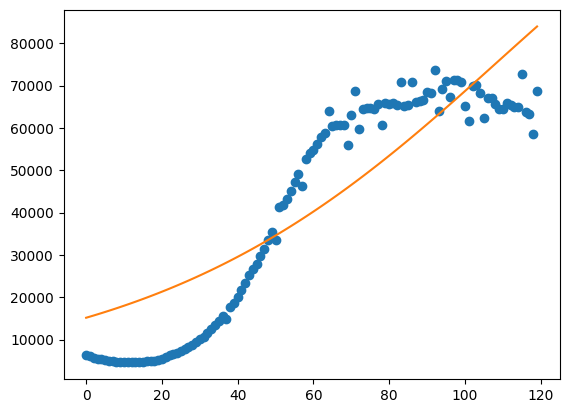

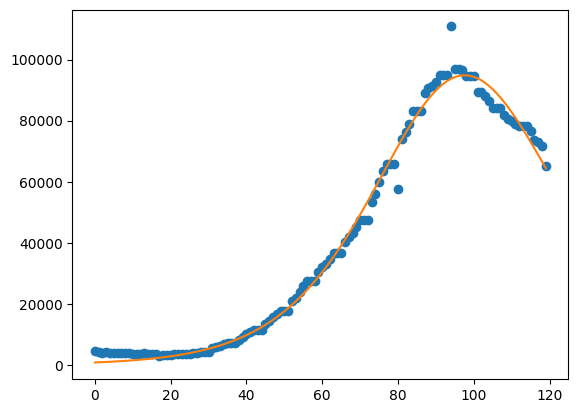

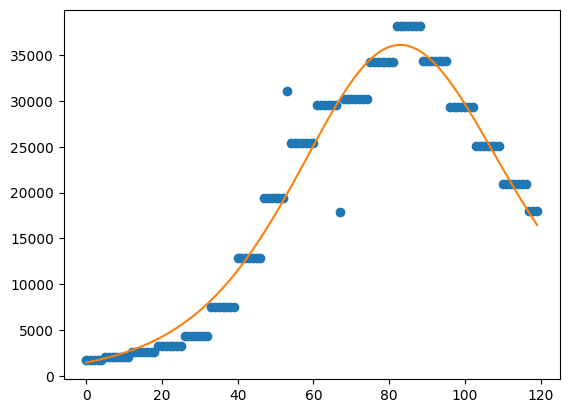

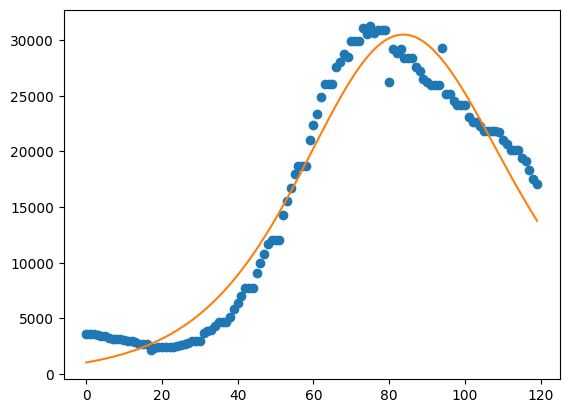

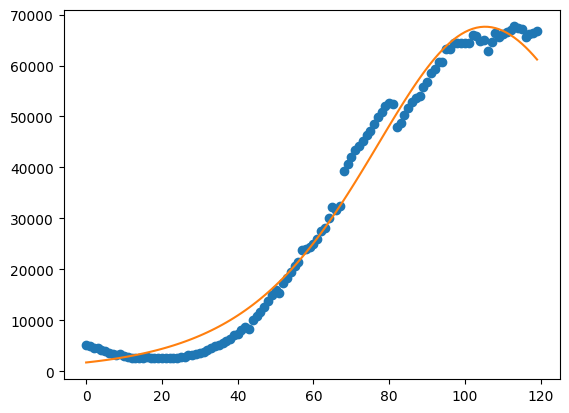

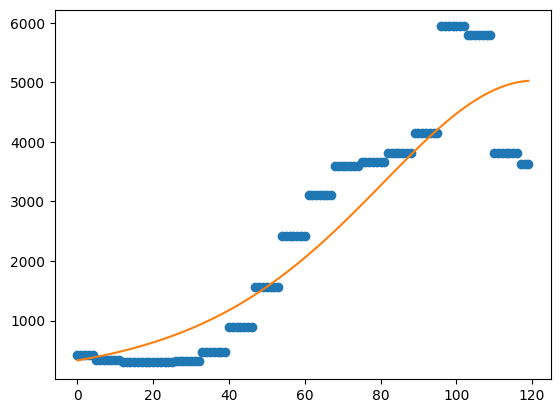

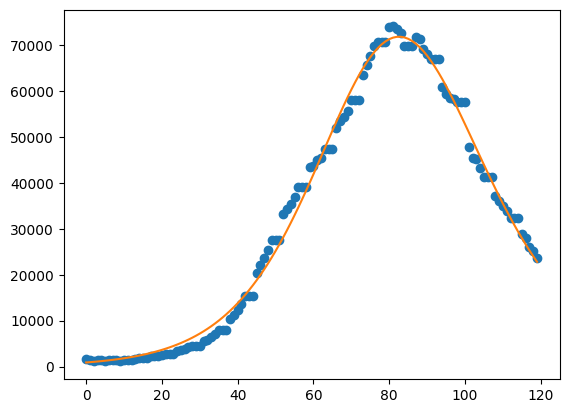

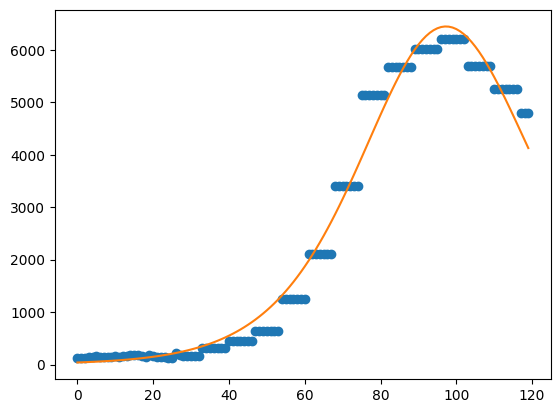

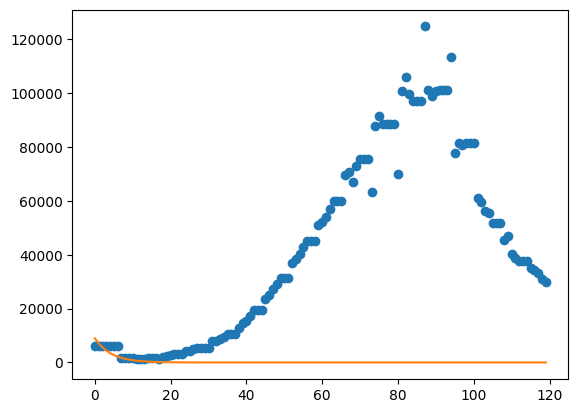

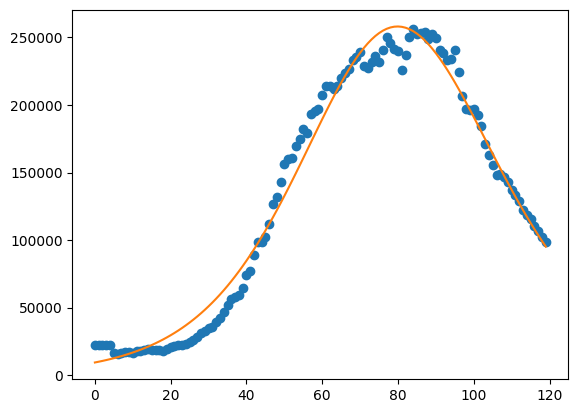

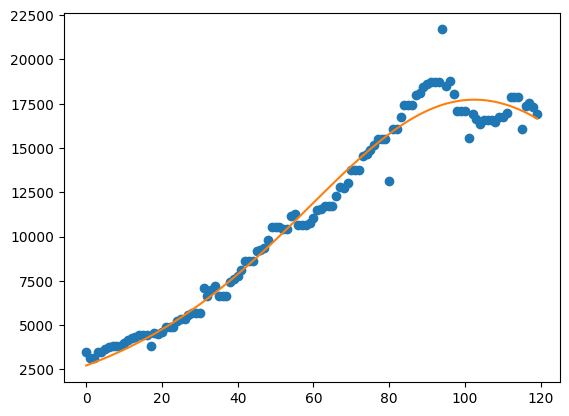

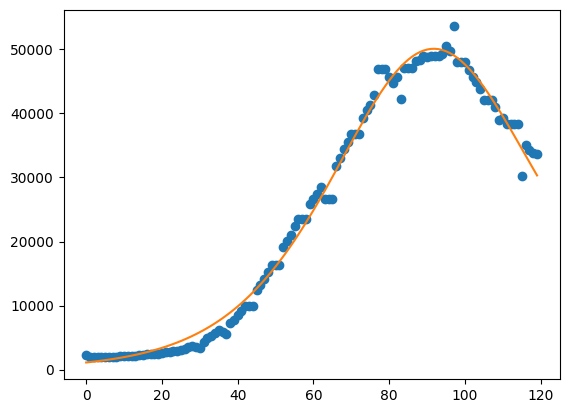

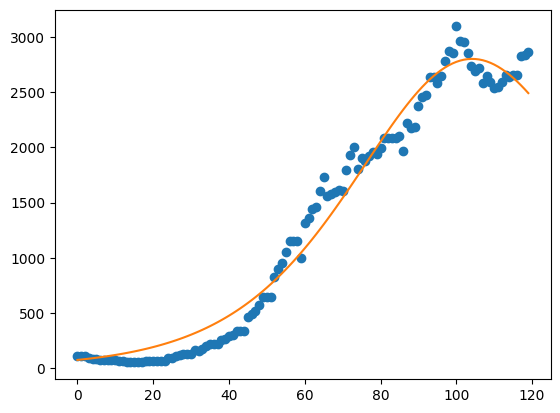

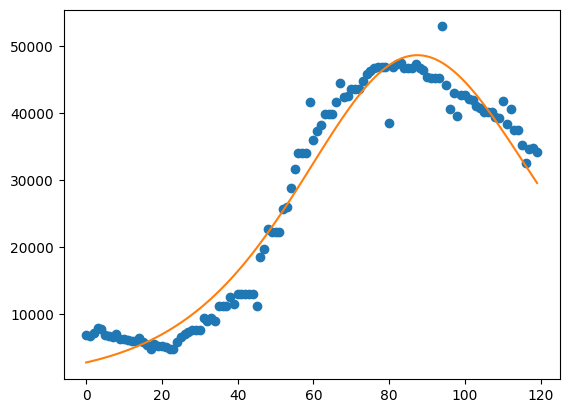

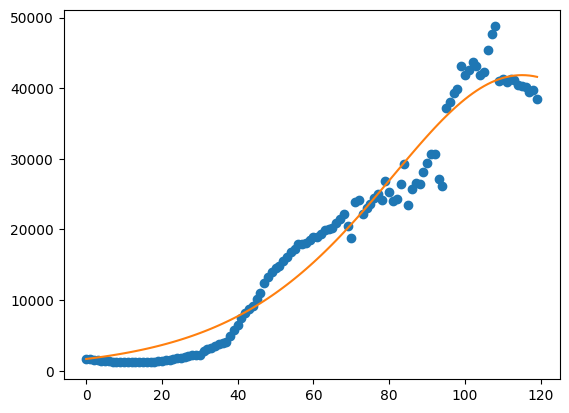

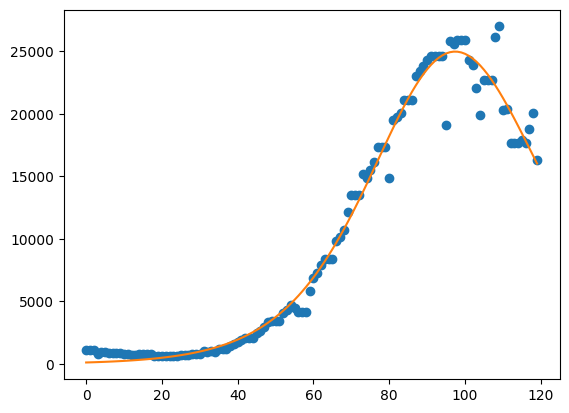

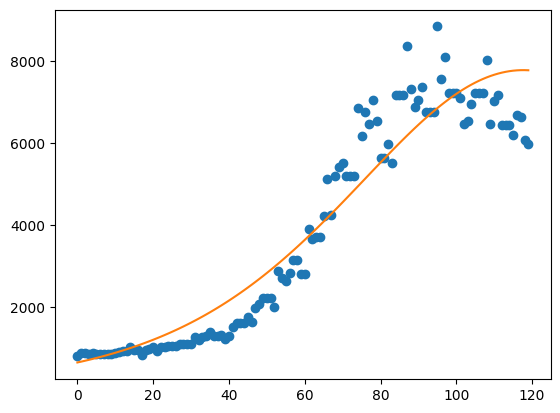

In [ ]:
# ydata = np.array(y_total, dtype=float) * N
xdata = np.arange(0,4*30) #120 days

# Returns the active case counts over time
def fit_odeint(x, beta, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]


# popt - calculated optimal parameter values that can minimize the sum of squared errors
popt_list = []
for i in tqdm(range(len(df_active_cases)), "Fitting betas for all counties..."): #county number
  state = df_active_cases.iloc[i]['State']
  # print(fips)
  N = df_population[df_population['State']==state]['population'].values[0] #population
  # print(N)
  ydata = df_active_cases.iloc[i, 500:500+4*30].values # start from day 500, then look at 120 days after
  # print(ydata)
  try:
    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N))
  except:
    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N), maxfev = 20000)

  popt_list.append(popt)
  # print(popt)
  fitted = fit_odeint(xdata, *popt)
  plt.plot(xdata, ydata, 'o')
  plt.plot(xdata, fitted)
  plt.show()




In [ ]:
# popt_array = np.array(popt_list)
# np.save("popt_array.npy",popt_array )
popt_list = np.load("popt_array.npy")
popt_list.shape

## **First 4 Month store S, I, R**

In [ ]:
def four_months_sir():
  sir_list=[]
  for j in tqdm(range(len(df_active_cases))): #county
    pop = popt_list[j]

    state = df_active_cases.iloc[j]['State']
    N = df_population[df_population['State']==state]['population'].values[0] #population

    #fist 120 days
    ret = odeint(deriv, (N, pop[2], 0), np.arange(0, 120), args=(N, pop[0], pop[1]))
    S, I, R = ret.T

    sir_list.append((S[-1], I[-1], R[-1]))


  return sir_list

sir_list = np.array(four_months_sir())

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
sir_list.shape

(51, 3)

In [ ]:
df_pop = [df_population[df_population['State']==state]['population'].values[0] for state in df_active_cases['State']] #population
df_pop

[731545,
 4903185,
 3017804,
 7278717,
 39512223,
 5758736,
 3565287,
 705749,
 973764,
 21477737,
 10617423,
 1415872,
 3155070,
 1787065,
 12671821,
 6732219,
 2913314,
 4467673,
 4648794,
 6892503,
 6045680,
 1344212,
 9986857,
 5639632,
 6137428,
 2976149,
 1068778,
 10488084,
 762062,
 1934408,
 1359711,
 8882190,
 2096829,
 3080156,
 19453561,
 11689100,
 3956971,
 4217737,
 12801989,
 1059361,
 5148714,
 884659,
 6829174,
 28995881,
 3205958,
 8535519,
 623989,
 7614893,
 5822434,
 1792147,
 578759]

## **Vaccine evolution simulation**

In [ ]:
# Returns the active case counts over time
def deriv_vaccine(y, t, N, beta, gamma, v):
    S, I, R = y
    dSdt = -beta * S * I / N - v
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I + v
    return dSdt, dIdt, dRdt


def evol(vc):
  total_number =0.
  for j in range(len(df_active_cases)): #county
    pop = popt_list[j]
    N = df_pop[j]

    #vaccine day

    # ret= odeint(deriv_vaccine, (sir_list[j,0], sir_list[j,1], sir_list[j,2]), np.arange(0,1), args=(N, pop[0], pop[1], vc[j]*100000))
    # print(N, sir_list[j,0], sir_list[j,1], sir_list[j,2])

    vaccine = min(vc[j]*100000, sir_list[j,0])
    S, I, R = sir_list[j,0]-vaccine, sir_list[j,1], sir_list[j,2]+vaccine

    #after vaccine 30 days
    i_t = odeint(deriv, (S, I, R), np.arange(0, 30), args=(N, pop[0], pop[1]))[:,1]
    i_sum = np.sum(i_t)
    if i_sum < -1e+3:
      i_sum=0
    # print(i_sum)
    total_number += i_sum #output objective
  return total_number/10000000

  0%|          | 0/1364 [00:00<?, ?it/s]

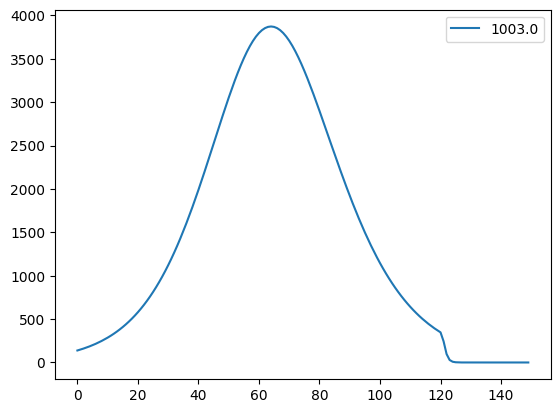

In [ ]:
# result = 0
# for i in tqdm(range(len(popt_list))): #county
#   pop=popt_list[i]
#   fips = df_active_cases.iloc[i]['countyFIPS']
#   population = df_population[df_population['countyFIPS']==fips]['population'].values[0] #population

#   after_vaccine_infection=odeint(deriv_vaccine, (population, pop[2], 0), np.arange(0,150), args=(population, pop[0], pop[1], vaccine_sample[i]))[:,1]
#   if i==1:
#     plt.plot(after_vaccine_infection, label=fips)
#     plt.legend()
#     result +=after_vaccine_infection[-1]
#   # print(result)
#   if i>2:
#     break



## **Optimization**

In [ ]:
from scipy.optimize import minimize

In [ ]:
def constraint_sum(x):
    return 100000000/100000 - np.sum(x)
cons = ({'type': 'ineq', 'fun': constraint_sum})
bounds = [(0, 100000000/100000) for _ in range(len(df_active_cases))]

In [ ]:
# x0=np.array(vaccine_sample)
x0=np.array(df_pop)/1000000 #initialize by population
print(x0)
import time
import warnings
start_time = time.time()
#vaccine normalized by 0.1M
#infection people normalized by 10M
optim = minimize(evol, x0, method='SLSQP', bounds=bounds, constraints=cons, tol=1e-6, options={'maxiter':10000, "disp":True}) #, method='SLSQP' 'Nelder-Mead
print("Trained for: ", (time.time()-start_time)/60, "minutes")
print(optim)

[ 0.731545  4.903185  3.017804  7.278717 39.512223  5.758736  3.565287
  0.705749  0.973764 21.477737 10.617423  1.415872  3.15507   1.787065
 12.671821  6.732219  2.913314  4.467673  4.648794  6.892503  6.04568
  1.344212  9.986857  5.639632  6.137428  2.976149  1.068778 10.488084
  0.762062  1.934408  1.359711  8.88219   2.096829  3.080156 19.453561
 11.6891    3.956971  4.217737 12.801989  1.059361  5.148714  0.884659
  6.829174 28.995881  3.205958  8.535519  0.623989  7.614893  5.822434
  1.792147  0.578759]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1684201009229243
            Iterations: 86
            Function evaluations: 4479
            Gradient evaluations: 86
Trained for:  2.079236610730489 minutes
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.1684201009229243
       x: [ 4.580e+00  1.345e+01 ...  7.692e+00  4.064e+00]
     nit: 86
     jac: [-1.892e-03 -5.330e-04 ... -7.519e-04 -1.194

Text(0.5, 0, 'State')

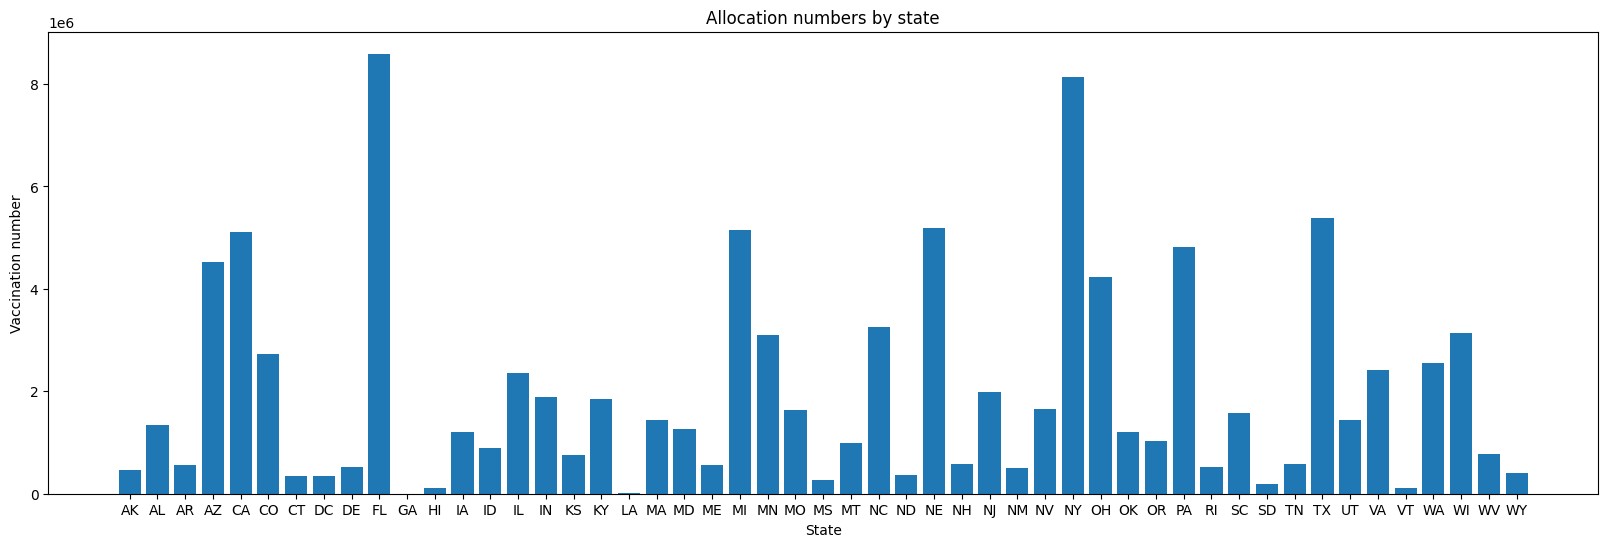

In [ ]:
solution = np.array(optim.x)*100000
fig, ax = plt.subplots(1,1, figsize = (20,6))
# before_optimization = evol(x0)*10000000
# after_optimization = evol(optim.x)*10000000
ax.bar(df_active_cases["State"], solution)
ax.set_title("Allocation numbers by state")
ax.set_ylabel("Vaccination number")
ax.set_xlabel("State")
# ax[1].plot([before_optimization, after_optimization])
# ax[1].set_title("Infection people before after optimization")